In [39]:
# 1. Load the Titanic dataset using Seaborn

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [40]:

# 2. Load Titanic Dataset
df = sns.load_dataset('titanic')
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [41]:
# . Data Preprocessing
# a) Check for Missing Values

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [42]:
# Handle Missing Values
# Handle Missing Values

# Fill 'age' with the median (numerical)
df['age'] = df['age'].fillna(df['age'].median())

# Drop 'deck' column due to excessive missing values
df.drop(columns=['deck'], inplace=True)

# Fill 'embarked' and 'embark_town' with the mode (categorical)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Confirm missing values handled
print("\nMissing Values After Handling:\n", df.isnull().sum())




Missing Values After Handling:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


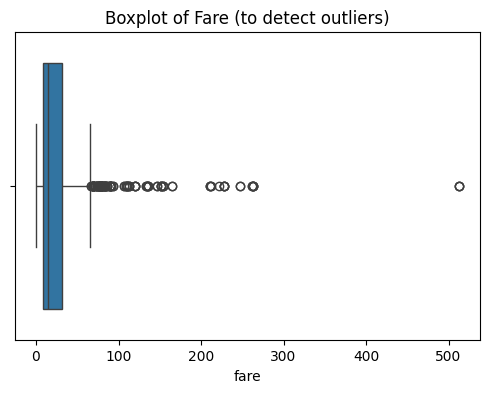

In [43]:
# 4. Check for Outliers in 'fare'

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['fare'])
plt.title("Boxplot of Fare (to detect outliers)")
plt.show()

# # 

# Outliers can drastically increase or decrease the mean.

# E.g., in the Titanic dataset, if most ticket prices are between 10 and 50, but one ticket is 512, the average (mean) becomes misleading.

# They distort standard deviation, making it appear that there's more variability than there actually is.

# 

In [44]:
# Scaling / Normalization

scaler = StandardScaler()
df['fare_scaled'] = scaler.fit_transform(df[['fare']])

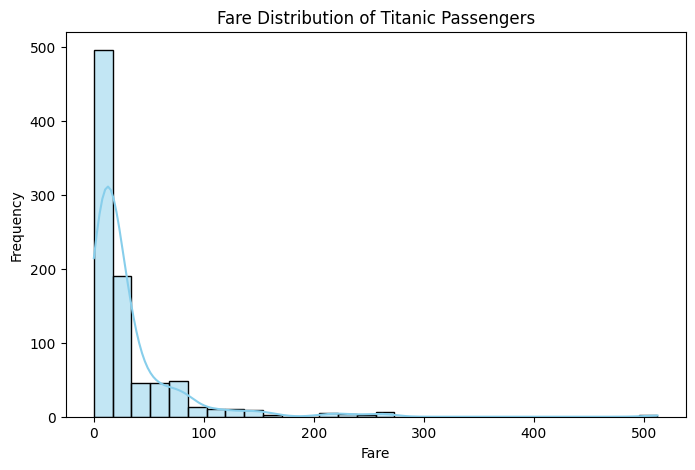

In [45]:
# Visualize Fare Distribution with Histogram

plt.figure(figsize=(8, 5))
sns.histplot(df['fare'], bins=30, kde=True, color='skyblue')
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

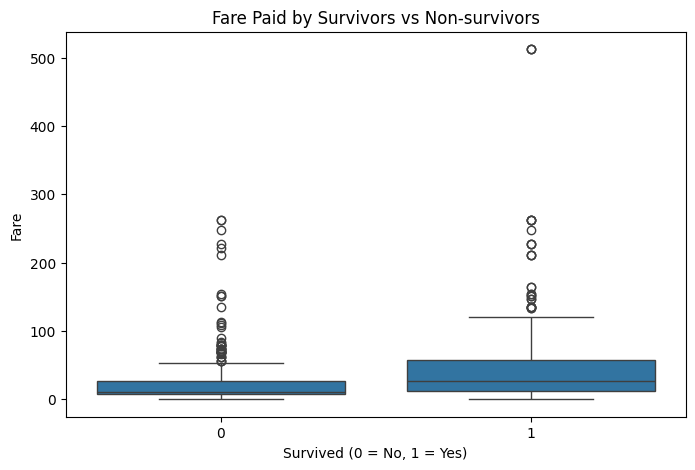

In [46]:
 # Explore Patterns (e.g., Survival vs Fare)

plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare Paid by Survivors vs Non-survivors")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()
